```bash
jupyter nbconvert "D:\OneDrive - Nexus365\Private_Dropbox\Projects\trialexp\notebooks\noncanonical\nb20230309_145600_session_history.ipynb" --to="python" --output-dir="D:\OneDrive - Nexus365\Private_Dropbox\Projects\trialexp\notebooks\noncanonical" --output="nb20230309_145600_session_history"
```

Create a plot to follow session history of multiple mice

- X axis = datetime
- Y axis = mice

A session is represented as a box, whose left end shows the time of Beginning of sessions for a task

If two sessions of different tasks are run in a short amount of time (eg 1 day), they use different Y values

Get pycontrol data files

folders and animal_id?

In [48]:
import os
import re
import pandas as pd
from datetime import datetime
from datetime import timedelta

# import tkinter as tk
# from tkinter import filedialog


homedir = r"\\ettin\Magill_Lab\Julien\Data\head-fixed\pycontrol"

subject_ids = ['RE602','RE603','RE604']

tasks = ['pavlovian_spontanous_reaching_march23',
         'reaching_go_spout_feb23',
         'reaching_go_spout_nov22',
         'reaching_go_spout_incr_break2_nov22',
         'reaching_go_spout_bar_nov22']

# subject_ids = ['kms058','kms060','kms061','kms062','kms063','kms064']

# tasks = ['reaching_go_spout_nov22',
#          'reaching_go_spout_incr_break2_nov22',
#          'reaching_go_spout_bar_nov22']
# get these by: list(set(df['task_name']))
# You can manually specify the order here

In [49]:

items = os.listdir(homedir)

folders = [os.path.join(homedir, item) for item in items if os.path.isdir(
    os.path.join(homedir, item))]

print(folders)

['\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\exp01', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\JC301LS', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\pavlovian_nobar_nodelay', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\go_rewarding_aversive_2', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\go_rewarding_aversive', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\train_go_pavlovian', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\pavlovian_2s_delay', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\water_calibration', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\ReachTest', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\check_light', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\train_Go_CS-US_pavalovian_with_bar_pulses', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\reaching_go_spout_cued_uncued_opto', '\\\

In [50]:
# folders = [r'\\ettin\Magill_Lab\Julien\Data\head-fixed\pycontrol\reaching_go_spout_bar_nov22']
filenames = []
folder_paths = []
for fld in folders:
    files = os.listdir(fld)

    # Filter out the files whose names don't match the regular expression pattern
    regex = re.compile('^(' + '|'.join(subject_ids) + ').+\.txt$')
    matching_files = [file for file in files if regex.match(file)]
    folders_ = [fld for file in files if regex.match(file)]

    if matching_files:
        filenames = filenames + matching_files
        folder_paths = folder_paths + folders_


df = pd.DataFrame({'folder':folder_paths,'filename':filenames})

def get_date(text):
    match = re.search('\d{4}\-\d{2}\-\d{2}\-\d{6}', text)
    date_str = match.group(0)
    date_obj = datetime.strptime(date_str, '%Y-%m-%d-%H%M%S')
    return date_obj

df['datetime'] = df['filename'].apply(get_date)

df = df.sort_values(by='datetime', ascending=True)
df.reset_index(drop=True, inplace=True)
print(df)


                                               folder  \
0   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
1   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
2   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
3   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
4   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
5   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
6   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
7   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
8   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
9   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
10  \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
11  \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
12  \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
13  \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
14  \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
15  \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
16  \\ettin\Magill_Lab\Julien\D

extract datetime and task names

In [51]:
# add columns
df['subject_id'] = 'kms000'
df['task_name'] = 'task'
df['start_date'] = datetime.now()

for index, row in df.iterrows():

    with open(os.path.join(df['folder'][index], df['filename'][index]), 'r') as f:
        all_lines = [line.strip() for line in f.readlines() if line.strip()]

    m = None
    i = 0
    while m is None:
        m = re.match('^I\sSubject\sID\s\:\s(.+)', all_lines[i])
        i += 1
    subject_id = m.group(1)
    # print(f"{subject_id}")

    m = None
    i = 0
    while m is None:
        m = re.match('^I\sTask\sname\s\:\s(.+)', all_lines[i])
        i += 1
    task_name = m.group(1)
    # print(f"{task_name}")

    m = None
    i = 0
    while m is None:
        m = re.match('^I\sStart\sdate\s\:\s(.+)', all_lines[i])
        i += 1
    start_date = m.group(1)
    # print(f"{start_date}")

    start_datetime = datetime.strptime(start_date, '%Y/%m/%d %H:%M:%S')

    df.at[index, 'subject_id'] = subject_id
    df.at[index, 'task_name'] = task_name
    df.at[index, 'start_date'] = start_datetime

print(df)

                                               folder  \
0   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
1   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
2   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
3   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
4   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
5   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
6   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
7   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
8   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
9   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
10  \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
11  \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
12  \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
13  \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
14  \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
15  \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
16  \\ettin\Magill_Lab\Julien\D

In [63]:
timedelta(days=1)


datetime.timedelta(days=1)

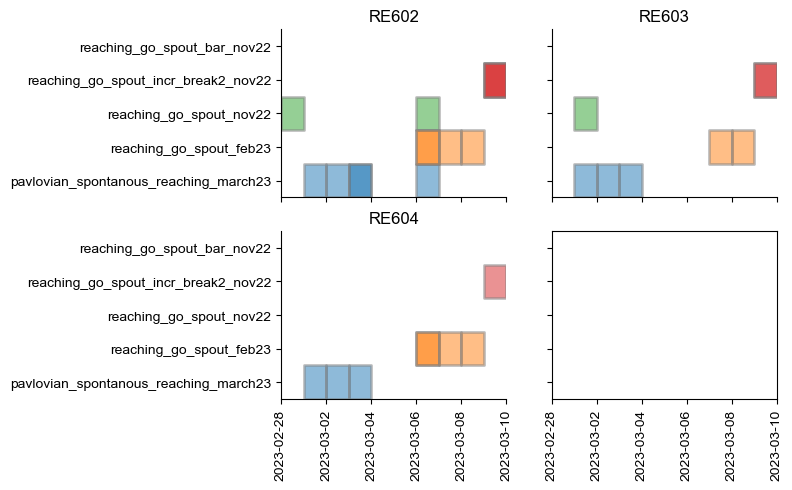

In [65]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
from math import ceil
import warnings

plt.rcParams['font.family'] = ['Arial']

fig, ax = plt.subplots(ceil(len(subject_ids)/2), 2, sharex=True, sharey=True)

colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd',
          u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']

min_date = min(df.loc[df['subject_id'].isin(subject_ids), 'datetime']).date()
max_date = (max(df.loc[df['subject_id'].isin(subject_ids), 'datetime']) + timedelta(days=1)).date()

ax_flat = ax.ravel()

i = 0
for sbj in subject_ids:
    ax_flat[i].set_title(sbj)
    i += 1

for sbj_idx, sbj in enumerate(subject_ids):

    for index, row in df.iterrows():

        if df['subject_id'].iloc[index] == sbj:

            try:
                task_ind = tasks.index(df['task_name'].iloc[index])
            except:
                warnings.warn(f"{df['task_name'].iloc[index]} is not found in tasks")
                continue

            start_date = df.start_date[index].date()
            width = timedelta(days=1)
            height = 1
            bottom_left = [start_date, task_ind]

            # Create a Rectangle patch with rounded corners
            rect = Rectangle(bottom_left, width, height,
                linewidth = 2, edgecolor = [0.5, 0.5, 0.5],
                facecolor=colors[task_ind], alpha=0.5,
                clip_on=True, joinstyle='round')
        
            # Add the patch to the Axes
            ax_flat[sbj_idx].add_patch(rect)

  
    # ax.set_xlim(auto=True)
    ax_flat[sbj_idx].set_xlim(min_date, max_date )
    ax_flat[sbj_idx].set_ylim(0,len(tasks))

    date_fmt = mdates.DateFormatter('%Y-%m-%d')
    ax_flat[sbj_idx].xaxis.set_major_formatter(date_fmt)

    ax_flat[sbj_idx].set_yticks([y + 0.5  for y in list(range(0, len(tasks)))])

    ax_flat[sbj_idx].spines['top'].set_visible(False)
    ax_flat[sbj_idx].spines['right'].set_visible(False)

for label in ax[-1,0].get_xticklabels():
    label.set_rotation(90)

for label in ax[-1,1].get_xticklabels():
    label.set_rotation(90)

ax[-1,0].set_yticks([y + 0.5  for y in list(range(0, len(tasks)))], tasks)

plt.show()
